<a href="https://colab.research.google.com/github/Aljaziri/WorldCup2018/blob/master/FIFA_WORLD_CUP_2018_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA World Cup 2018 Players Analysis

This is one of Udacity DSND projects in which a dataset is being analysed and CRISP process will be followed.





In [0]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

There are many ways to be able from Google Colab Notebook to access a CSV file.
I prefred maping the drive as it will give me the capablity to drag and drop files to my Google Drive.


*Refrence : https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92*



In [3]:
''' 
After running this code, the user will be asked to provide authorization code.
Login using your Google account and copy the code you got and paste it in the field displayed to you.

''''

from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# Mounting the directry as drive, you can access it from the left menu.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd /content/drive/My Drive/Colab Notebooks/FIFA WORLD CUP 2018 Players

/content/drive/My Drive/Colab Notebooks/FIFA WORLD CUP 2018 Players


In [9]:
# Load the CSV file into Pandas data frame :

df = pd.read_csv('wc2018-players.csv')

# Exploring the data  frame fields :
df.head()

,Team,#,Pos.,FIFA Popular Name,Birth Date,Shirt Name,Club,Height,Weight
0,Argentina,3,DF,TAGLIAFICO Nicolas,31.08.1992,TAGLIAFICO,AFC Ajax (NED),169,65
1,Argentina,22,MF,PAVON Cristian,21.01.1996,PAVÓN,CA Boca Juniors (ARG),169,65
2,Argentina,15,MF,LANZINI Manuel,15.02.1993,LANZINI,West Ham United FC (ENG),167,66
3,Argentina,18,DF,SALVIO Eduardo,13.07.1990,SALVIO,SL Benfica (POR),167,69
4,Argentina,10,FW,MESSI Lionel,24.06.1987,MESSI,FC Barcelona (ESP),170,72


In [110]:
# Get the number of teams

len(df.Team.unique())


32

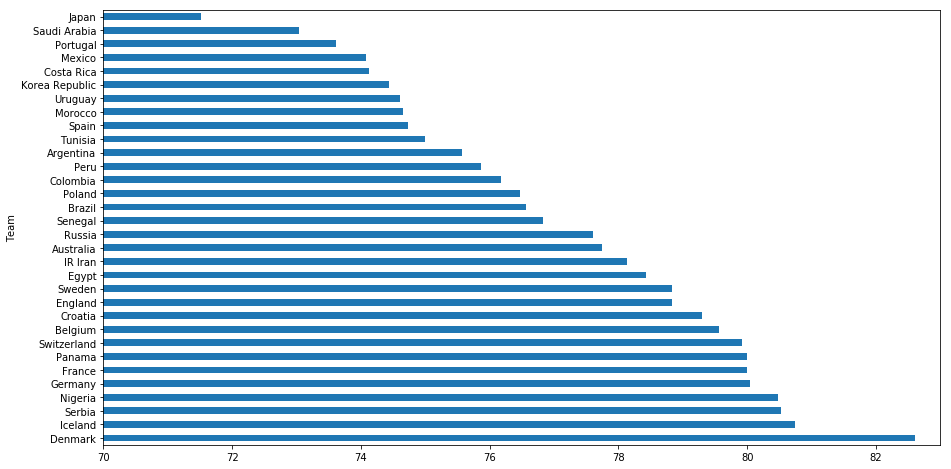

In [96]:
''' 
Calclate the avreage weight of each team.
Then plot it as horizintal bar.
The range of the chart is between 70 and 83 to make the diffrences more obvious visually.
'''

df.groupby("Team").Weight.mean().sort_values(ascending=False).plot.barh(x='Team' , figsize=(15, 8) , xlim=[70, 83]  )

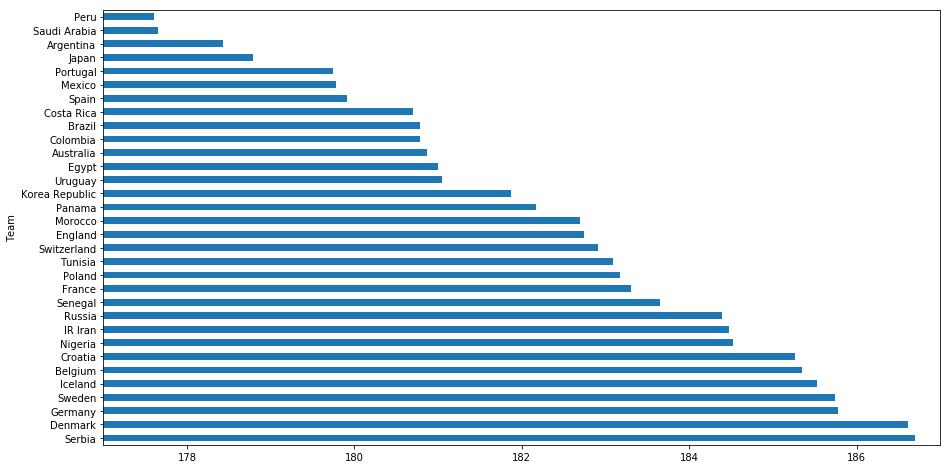

In [104]:
''' 
Calclate the avreage hight of each team.
Then plot it as horizintal bar.
The range of the chart is between 177 and 187 to make the diffrences more obvious visually.
'''


df.groupby("Team").Height.mean().sort_values(ascending=False).plot.barh(x='Team' , figsize=(15, 8) , xlim=[177, 187]  )

In [0]:
''' 
Calclate the Body Mass Index for each team.
The formula is :
BMI = Weight / Height^2
This is in case the units are metere and KG.
Ref : https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/childrens_bmi_formula.html

To make this calaculation easy for ourself, a coulmn is being added in which the Height is being sequared for each player:
'''

Height2 = (df.Height/100)*(df.Height/100)
df['Height2'] = Height2  
                          

In [0]:
# Calculate the BMI and append it in a coulmn to the data frame

BMI = df.Weight/df.Height2        
df['BMI'] = BMI

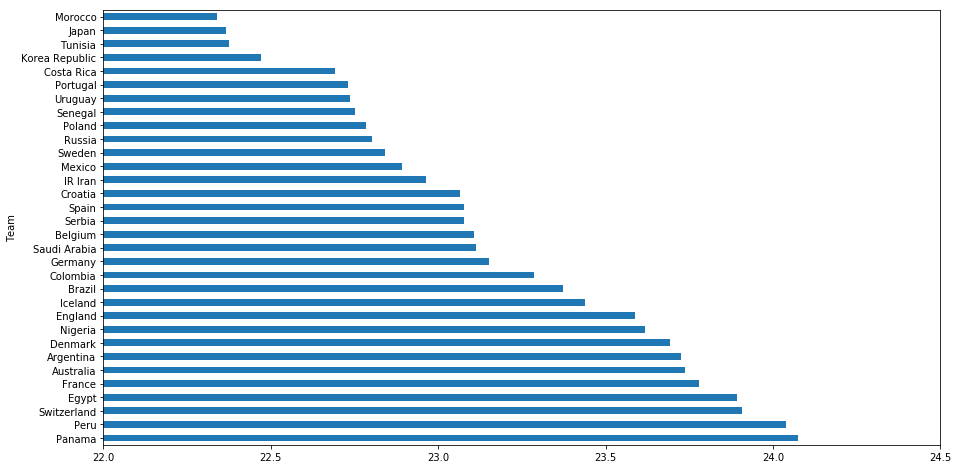

In [98]:
''' 
Plot the average BMI for each team as horizintal bar.
The range of the chart is between 22 and 24.5 to make the diffrences more obvious visually.
'''
df.groupby("Team").BMI.mean().sort_values(ascending=False).plot.barh(x='Team' , figsize=(15, 8) , xlim=[22, 24.5]  )

In [62]:
# Find the top 5 players with the most height

df.sort_values('Height', ascending=False)[['FIFA Popular Name', 'Height'] ].head(5)

,FIFA Popular Name,Height
160,KALINIC Lovre,201
183,VESTERGAARD Jannik,200
20,FAZIO Federico,199
67,COURTOIS Thibaut,199
665,OLSEN Robin,198


In [63]:
# Find the top 5 players with the least height

df.sort_values('Height', ascending=True)[['FIFA Popular Name', 'Height'] ].head(5)

,FIFA Popular Name,Height
554,YAHIA ALSHEHRI,165
437,QUINTERO Alberto,165
678,SHAQIRI Xherdan,165
368,AQUINO Javier,166
2,LANZINI Manuel,167


In [66]:
# Find the top 5 players with the most Weight

df.sort_values('BMI', ascending=False)[['FIFA Popular Name', 'Weight','BMI'] ].head(5)

,FIFA Popular Name,Weight,BMI
574,ABDULLAH ALMUAIOUF,98,30.930438
678,SHAQIRI Xherdan,78,28.650138
459,TORRES Roman,99,28.010412
229,KANE Harry,98,27.727478
458,CUMMINGS Harold,92,27.471707


In [105]:
# Find the top 5 players with the least weight

df.sort_values('BMI', ascending=True)[['FIFA Popular Name', 'Weight', 'BMI'] ].head(5)

,FIFA Popular Name,Weight,BMI
509,BRUNO FERNANDES,64,19.110753
93,MOJICA Johan,66,19.284149
207,LINGARD Jesse,60,19.591837
553,SALMAN ALFARAJ,63,19.662308
628,DE GEA David,71,19.667590
